# Product Analysis

In [5]:
import pandas as pd 
def missing_number(num):
    n = len(num) 
    for i in range(n):
        if i not in num:
            return i 

print (missing_number([0,1,3]))

2


In [ ]:
def is_palindrome(s):
    """
    Check if a string is a palindrome.
    Ignores spaces and converts to lowercase.
    """
    # Remove spaces and convert to lowercase
    cleaned = s.replace(" ", "").lower()
    
    # Check if string equals its reverse
    return cleaned == cleaned[::-1]

# Test cases
print(is_palindrome("racecar"))        # True
print(is_palindrome("hello"))          # False
print(is_palindrome("A man a plan a canal Panama"))  # True
print(is_palindrome("noon"))           # True
print(is_palindrome("python"))         # False

In [ ]:
# Count unique events for each user_id
unique_events_by_user = df.groupby('user_id')['event'].nunique()
print(unique_events_by_user)

# Or as a dataframe with reset_index for better formatting
unique_events_by_user = df.groupby('user_id')['event'].nunique().reset_index(name='unique_event_count')
print(unique_events_by_user)

In [1]:
import pandas as pd
import pandas as pd

data = [
    ['01-01-2024', 123, 'A', 57, 'seo', 'alpha', 'web'],
    ['01-01-2024', 765, 'B', 59, 'brand', 'beta', 'web'],
    ['01-07-2024', 943, 'C', 100, 'tv', 'alpha', 'mobile'],
    ['01-09-2024', 587, 'A', 103, 'radio', 'gamma', 'mobile'],
    ['01-11-2024', 976, 'D', 102, 'tv', 'alpha', 'web'],
]
cols = ['file_date', 'id', 'sku', 'price', 'channel', 'customer_segment', 'platform']

df = pd.DataFrame(data, columns=cols)
df['file_date'] = pd.to_datetime(df['file_date'], format='%m-%d-%Y')
df['id'] = df['id'].astype(str)
df['price'] = pd.to_numeric(df['price'])
print(df)

   file_date   id sku  price channel customer_segment platform
0 2024-01-01  123   A     57     seo            alpha      web
1 2024-01-01  765   B     59   brand             beta      web
2 2024-01-07  943   C    100      tv            alpha   mobile
3 2024-01-09  587   A    103   radio            gamma   mobile
4 2024-01-11  976   D    102      tv            alpha      web


In [ ]:
daily_by_platform = (
    df.groupby(['file_date', 'platform'])
      .agg(total_users=('id', 'nunique'),
           total_revenue=('price', 'sum'))
      .reset_index()
)

print(daily_by_platform)1. 12mismmm1

   file_date platform  total_users  total_revenue
0 2024-01-01      web            2            116
1 2024-01-07   mobile            1            100
2 2024-01-09   mobile            1            103
3 2024-01-11      web            1            102


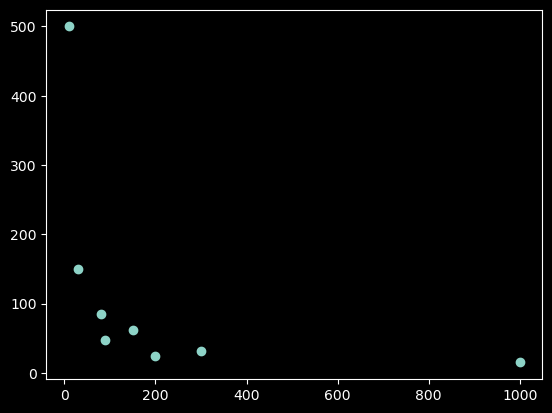

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['price'], df['stock'])
plt.xlabel('Price at X-axis')
plt.ylabel('Stock at Y-axis')
plt.show()

## Intuit Interview Q

In [1]:
import pandas as pd

# Define the data as a list of lists
data = [
    ['01-01-2024', 123, 'A', 57, 'seo', 'alpha', 'web'],
    ['01-01-2024', 765, 'B', 59, 'brand', 'beta', 'web'],
    ['01-07-2024', 943, 'C', 100, 'tv', 'alpha', 'mobile'],
    ['01-09-2024', 587, 'A', 103, 'radio', 'gamma', 'mobile'],
    ['01-11-2024', 976, 'D', 102, 'tv', 'alpha', 'web']
]

# Define the column names
columns = ['file_date', 'id', 'sku', 'price', 'channel', 'customer_segment', 'platform']

# Create the DataFrame
df = pd.DataFrame(data, columns=columns)

# Display the DataFrame
print(df)

    file_date   id sku  price channel customer_segment platform
0  01-01-2024  123   A     57     seo            alpha      web
1  01-01-2024  765   B     59   brand             beta      web
2  01-07-2024  943   C    100      tv            alpha   mobile
3  01-09-2024  587   A    103   radio            gamma   mobile
4  01-11-2024  976   D    102      tv            alpha      web


In [2]:
df.groupby(['file_date', 'platform'])['id'].nunique().reset_index(name='active_users')

,file_date,platform,active_users
0,01-01-2024,web,2
1,01-07-2024,mobile,1
2,01-09-2024,mobile,1
3,01-11-2024,web,1


In [2]:
# Aggregate: total users and total revenue by file_date and platform
agg_data = df.groupby(['file_date', 'platform']).agg(
    total_user=('id', 'nunique'),
    total_revenue=('price', 'sum')
).reset_index()

print("Aggregated Data:")
print(agg_data)
print("\n")

# Pivot table: file_date as rows, platform as columns for users
pivot_users = agg_data.pivot_table(
    index='file_date',
    columns='platform',
    values='total_user',
    fill_value=0
)

print("Total Users by Platform:")
print(pivot_users)
print("\n")

# Pivot table: file_date as rows, platform as columns for revenue
pivot_revenue = agg_data.pivot_table(
    index='file_date',
    columns='platform',
    values='total_revenue',
    fill_value=0
)

print("Total Revenue by Platform:")
print(pivot_revenue)

Aggregated Data:
   file_date platform  total_user  total_revenue
0 2024-01-01      web           2            116
1 2024-01-07   mobile           1            100
2 2024-01-09   mobile           1            103
3 2024-01-11      web           1            102


Total Users by Platform:
platform    mobile  web
file_date              
2024-01-01     0.0  2.0
2024-01-07     1.0  0.0
2024-01-09     1.0  0.0
2024-01-11     0.0  1.0


Total Revenue by Platform:
platform    mobile    web
file_date                
2024-01-01     0.0  116.0
2024-01-07   100.0    0.0
2024-01-09   103.0    0.0
2024-01-11     0.0  102.0


In [5]:
daily_stat = df.groupby(['file_date', 'platform']).agg(
    total_users=('id', 'nunique'),
    total_revenue=('price', 'sum') 
).reset_index()
print(daily_stat)

    file_date platform  total_users  total_revenue
0  01-01-2024      web            2            116
1  01-07-2024   mobile            1            100
2  01-09-2024   mobile            1            103
3  01-11-2024      web            1            102


In [6]:
# ensure types
df['file_date'] = pd.to_datetime(df['file_date'], format='%m-%d-%Y')
df['id'] = pd.to_numeric(df['id'])
df['price'] = pd.to_numeric(df['price'])

# aggregate
agg = (
    df.groupby(['platform', 'file_date'])
      .agg(total_user=('id', 'nunique'),
           total_revenue=('price', 'sum'))
      .reset_index()
)

# pivot: file_date as rows, platform as columns
pivot_user = agg.pivot_table(index='file_date', columns='platform', values='total_user', fill_value=0)
pivot_revenue = agg.pivot_table(index='file_date', columns='platform', values='total_revenue', fill_value=0)

# print lines: platform day total_user total_revenue using pivots
for platform in pivot_user.columns:
    for day in pivot_user.index:
        users = pivot_user.loc[day, platform]
        revenue = pivot_revenue.loc[day, platform]
        print(f"{platform} {day.strftime('%m-%d-%Y')} {users} {revenue}")

mobile 01-01-2024 0.0 0.0
mobile 01-07-2024 1.0 100.0
mobile 01-09-2024 1.0 103.0
mobile 01-11-2024 0.0 0.0
web 01-01-2024 2.0 116.0
web 01-07-2024 0.0 0.0
web 01-09-2024 0.0 0.0
web 01-11-2024 1.0 102.0


In [7]:
print('hello world')

hello world


In [8]:
import pandas as pd

# Create sample dataset of customer_id and email
data = [
    {'customer_id': 1, 'email': 'alice.smith@example.com'},
    {'customer_id': 2, 'email': 'bob.jones@sub.mail.co.uk'},
    {'customer_id': 3, 'email': 'carol+promo@gmail.com'},
    {'customer_id': 4, 'email': 'dave_o-reilly@company.org'},
    {'customer_id': 5, 'email': 'eve@localhost'},
]

df = pd.DataFrame(data)

# Extract domain (everything after the '@')
df['domain'] = df['email'].str.split('@').str[-1]

print(df)

# Alternative using regex: df['domain'] = df['email'].str.extract(r'@(.+)$')[0]

   customer_id                      email          domain
0            1    alice.smith@example.com     example.com
1            2   bob.jones@sub.mail.co.uk  sub.mail.co.uk
2            3      carol+promo@gmail.com       gmail.com
3            4  dave_o-reilly@company.org     company.org
4            5              eve@localhost       localhost


In [9]:
import pandas as pd

# Create sample dataframe with user_id, event_name, event_datetime
data = [
    {'user_id': 1, 'event_name': 'click', 'event_datetime': '2024-01-01 10:00:00'},
    {'user_id': 1, 'event_name': 'browse', 'event_datetime': '2024-01-01 10:15:00'},
    {'user_id': 1, 'event_name': 'click', 'event_datetime': '2024-01-01 10:30:00'},
    {'user_id': 2, 'event_name': 'browse', 'event_datetime': '2024-01-01 11:00:00'},
    {'user_id': 2, 'event_name': 'fail', 'event_datetime': '2024-01-01 11:15:00'},
    {'user_id': 3, 'event_name': 'click', 'event_datetime': '2024-01-01 12:00:00'},
    {'user_id': 3, 'event_name': 'browse', 'event_datetime': '2024-01-01 12:30:00'},
    {'user_id': 3, 'event_name': 'fail', 'event_datetime': '2024-01-01 13:00:00'},
]

df = pd.DataFrame(data)

# Convert event_datetime to datetime type
df['event_datetime'] = pd.to_datetime(df['event_datetime'])

print(df)
print(f"\nDataframe shape: {df.shape}")
print(f"Data types:\n{df.dtypes}")

   user_id event_name      event_datetime
0        1      click 2024-01-01 10:00:00
1        1     browse 2024-01-01 10:15:00
2        1      click 2024-01-01 10:30:00
3        2     browse 2024-01-01 11:00:00
4        2       fail 2024-01-01 11:15:00
5        3      click 2024-01-01 12:00:00
6        3     browse 2024-01-01 12:30:00
7        3       fail 2024-01-01 13:00:00

Dataframe shape: (8, 3)
Data types:
user_id                    int64
event_name                object
event_datetime    datetime64[ns]
dtype: object


In [10]:
# Get the most recent event for each user
most_recent = df.loc[df.groupby('user_id')['event_datetime'].idxmax()].sort_values('user_id')
print("Most recent event for each user:")
print(most_recent)

Most recent event for each user:
   user_id event_name      event_datetime
2        1      click 2024-01-01 10:30:00
4        2       fail 2024-01-01 11:15:00
7        3       fail 2024-01-01 13:00:00


In [6]:
import pandas as pd
df = pd.DataFrame({
    'employee_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Mark', 'Mona', 'Eve'],
    'salary': [50000, 60000, 55000, 70000, 48000]
})

def calculate_special_bonus(employees: pd.DataFrame) -> pd.DataFrame:
    if (employees['employee_id'] % 2 ==1) & (~employees['name'].str.startswith('M', na=False)):
        employees['bonus'] = employees['salary']
    else:
        employees['bonus'] = 0 
    return employees[['employee_id', 'bonus']]

calculate_special_bonus(df)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().